# Clustering
We willen een dataset opdelen in groepen (clusters) zodat de punten in een cluster zo dicht mogelijk bij elkaar liggen en de punten in verschillende clusters zo ver mogelijk van elkaar liggen.
We gebruiken twee datasets om clustering te illustreren. De eerste dataset is een dataset met 10 punten in een 2D vlak. De tweede dataset is een dataset met 400 punten in een 2D vlak.

In [1]:
import IPython

IPython.InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
from scipy.spatial.distance import cdist

# eerste dataset
voorbeeld1 = pd.read_csv("data/hclust.csv")
voorbeeld1.index = [f'punt {i}' for i in range(1, 11)]
display(voorbeeld1)

,x,y
punt 1,2.0,7.0
punt 2,3.0,2.0
punt 3,3.0,6.0
punt 4,8.0,7.0
punt 5,9.0,1.0
punt 6,3.5,3.0
punt 7,4.0,2.0
punt 8,3.0,7.0
punt 9,7.0,5.5
punt 10,4.5,3.0


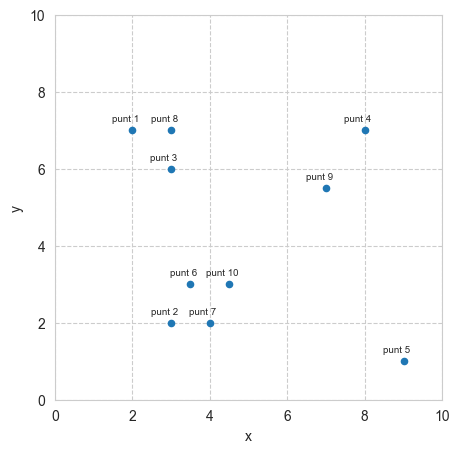

In [6]:
ax = voorbeeld1.plot(kind="scatter", x="x", y="y", figsize=(5, 5))
_ = ax.set_xlim(0, 10)
_ = ax.set_ylim(0, 10)
_ = ax.grid(linestyle='--')
for i in range(1, 11):
    label = f'punt {i}'
    _ = ax.annotate(label,
                    fontsize=7,
                    xy=(voorbeeld1.x[i - 1], voorbeeld1.y[i - 1]),
                    xytext=(-5, 5),
                    textcoords='offset points', ha='center', va='bottom')

# Afstanden

Om een clusteralgoritme te kunnen gebruiken moet je eerst een afstandsmatrix maken. Dit is een matrix waarin de afstanden tussen alle punten staan. De afstand tussen twee punten $p$ en $q$ kan je op verschillende manieren berekenen.

De meest gebruikte manier is de **Euclidische afstand**. Deze bereken je met de volgende formule:
&NewLine;
$\sqrt{\sum_{i=1}^{n}(p_i-q_i)^2}$
&NewLine;
Andere manieren zijn:
&NewLine;
**Manhattan afstand** of **Cityblock afstand**:
&NewLine;
$\sum_{i=1}^{n}|p_i-q_i|$
&NewLine;
**Gestandaardiseerde Euclidische** afstand:
&NewLine;
$\sqrt{\sum_{i=1}^{n}\frac{(p_i-q_i)^2}{s_i^2}}$



# Afstandsmatrices


In [7]:
afstanden = pd.DataFrame(cdist(voorbeeld1, voorbeeld1), columns=voorbeeld1.index, index=voorbeeld1.index)  # default is euclidean
# afstanden
# pd.DataFrame(cdist(voorbeeld1, voorbeeld1, metric="cityblock"), columns=voorbeeld1.index, index=voorbeeld1.index)
pd.DataFrame(cdist(voorbeeld1, voorbeeld1, metric="seuclidean"), columns=voorbeeld1.index, index=voorbeeld1.index)

,punt 1,punt 2,punt 3,punt 4,punt 5,punt 6,punt 7,punt 8,punt 9,punt 10
punt 1,0.000000,2.198906,0.605633,2.549883,3.943654,1.839919,2.318839,0.424980,2.221288,2.026755
punt 2,2.198906,0.000000,1.725958,3.028166,2.586133,0.480973,0.424980,2.157448,2.273869,0.769774
punt 3,0.605633,1.725958,0.000000,2.168269,3.340132,1.311793,1.777510,0.431490,1.713558,1.442920
punt 4,2.549883,3.028166,2.168269,0.000000,2.623586,2.576092,2.746692,2.124902,0.774287,2.278461
punt 5,3.943654,2.586133,3.340132,2.623586,0.000000,2.491613,2.168269,3.633799,2.119586,2.098107
punt 6,1.839919,0.480973,1.311793,2.576092,2.491613,0.000000,0.480973,1.738989,1.837416,0.424980
punt 7,2.318839,0.424980,1.777510,2.746692,2.168269,0.480973,0.000000,2.198906,1.976416,0.480973
punt 8,0.424980,2.157448,0.431490,2.124902,3.633799,1.738989,2.198906,0.000000,1.818968,1.839919
punt 9,2.221288,2.273869,1.713558,0.774287,2.119586,1.837416,1.976416,1.818968,0.000000,1.514083
punt 10,2.026755,0.769774,1.442920,2.278461,2.098107,0.424980,0.480973,1.839919,1.514083,0.000000


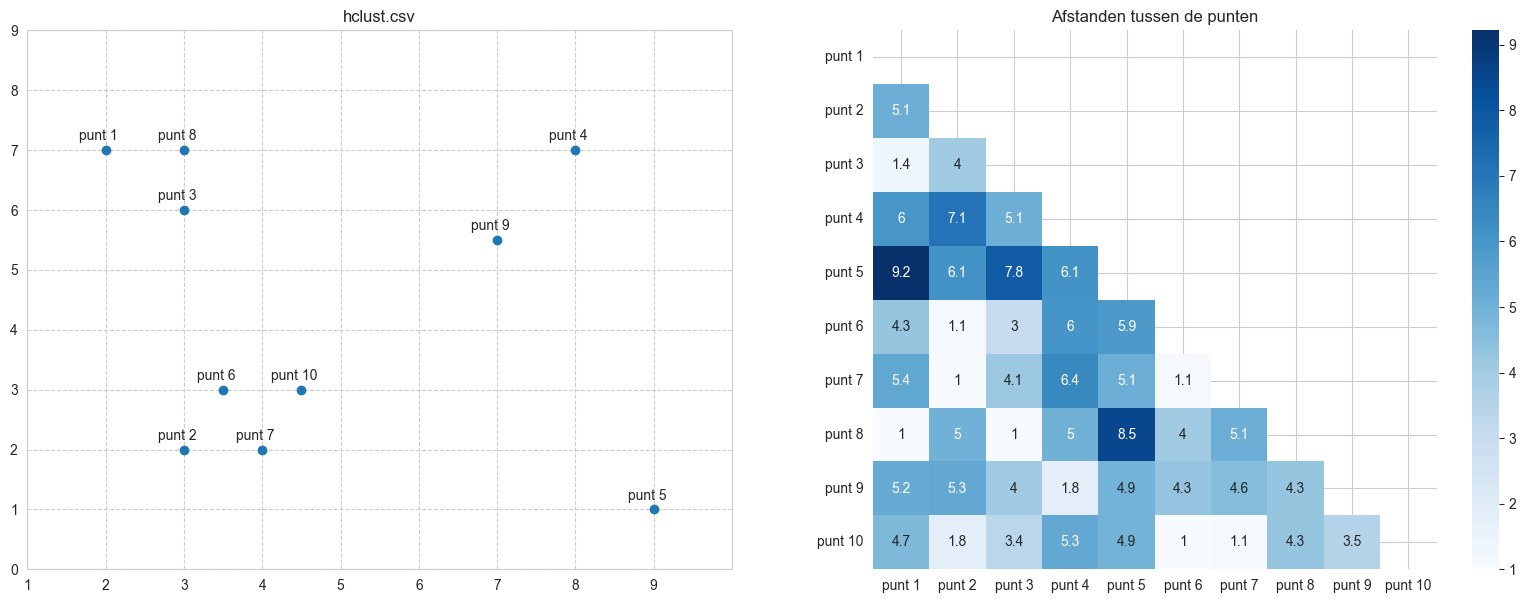

In [8]:
IPython.InteractiveShell.ast_node_interactivity = "none"
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# we willen alleen de onderste driehoek van de afstandsmatrix behouden voor de plot
# daarom zetten we de bovenste driehoek op nan
afstanden = afstanden.where(np.tril(np.ones(afstanden.shape)).astype(bool))
np.fill_diagonal(afstanden.values, np.nan)

cm = sns.light_palette("green", as_cmap=True)
# we plotten de afstandsmatrix als heatmap naast de punten
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
_ = axes[0].scatter(voorbeeld1.x, voorbeeld1.y)
_ = axes[0].set_xlim(1, 10)
_ = axes[0].set_ylim(0, 9)
_ = axes[0].set_xticks(range(1, 10))
_ = axes[0].set_yticks(range(10))
_ = axes[0].grid(linestyle='--')
_ = axes[0].set_title('hclust.csv')

for i in range(1, 11):
    label = 'punt {}'.format(i)
    _ = axes[0].annotate(label,
                         xy=(voorbeeld1.x[i - 1], voorbeeld1.y[i - 1]),
                         xytext=(-5, 5),
                         textcoords='offset points', ha='center', va='bottom')
_ = sns.heatmap(afstanden, annot=True, cmap="Blues", ax=axes[1])
_ = axes[1].set_yticklabels(labels=voorbeeld1.index, rotation=0)
_ = axes[1].set_title('Afstanden tussen de punten')


## Handmatig afstandsberekening

Je kan natuurlijk ook zelf de afstanden berekenen. Hieronder een voorbeeld van de afstand tussen punt 1 en punt 2 door toepassing van de Stelling van Pythagoras om de Euclidische afstand te berekenen.

In [10]:
IPython.InteractiveShell.ast_node_interactivity = "all"
print(np.sqrt(np.sum((voorbeeld1.iloc[0] - voorbeeld1.iloc[1]) ** 2)))

5.0990195135927845

# Clusteralgoritmen
## Vlakke Clustering
### K-Means


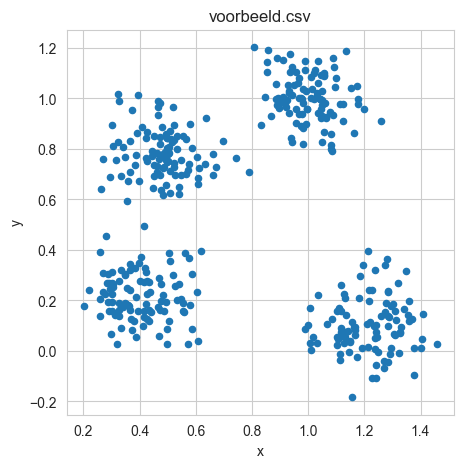

In [11]:
voorbeeld2 = pd.read_csv("datasets/voorbeeld.csv")
ax = voorbeeld2.plot(kind="scatter", x="x", y="y", figsize=(5, 5))
_ = ax.set_title("voorbeeld.csv")

In [32]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4, n_init='auto', max_iter=100)
model.fit(voorbeeld2)

KMeans(max_iter=100, n_clusters=4, n_init='auto')

Hiermee kun je de centroids van de clusters bekijken
als ook de punten in de cluster bekijken met hun bijbehorende clusternummer (label)


In [34]:
# pd.DataFrame(model.cluster_centers_, columns=["x", "y"])
df = pd.DataFrame(zip(voorbeeld2.x, voorbeeld2.y, model.labels_), columns=["x", "y", "cluster"])
display(df)

,x,y,cluster
0,0.465681,0.991396,3
1,0.575295,0.741192,3
2,0.463535,0.731243,3
3,0.474027,0.819973,3
4,0.387885,0.774880,3
...,...,...,...
395,1.117123,0.088956,2
396,1.211944,0.394294,2
397,1.328287,0.075084,2
398,1.128065,0.225451,2


KMeans(n_clusters=4, n_init='auto')

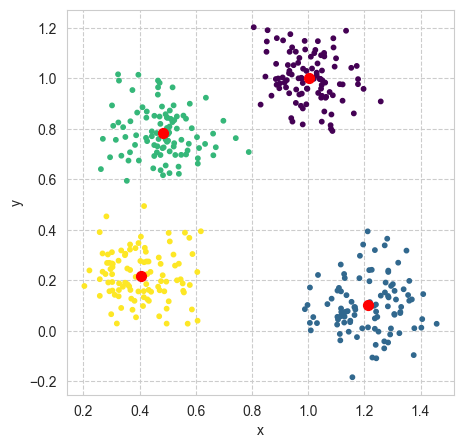

In [31]:
model = KMeans(n_clusters=4, n_init='auto')
model.fit(voorbeeld2)

cm = sns.color_palette("viridis", as_cmap=True)

# model.labels_
fig, ax = plt.subplots(figsize=(5, 5))
_ = ax.scatter(voorbeeld2.x, voorbeeld2.y, c=model.labels_, cmap=cm, s=10)
_ = ax.scatter(model.cluster_centers_[:, 0],
               model.cluster_centers_[:, 1], c='red', s=50)
_ = ax.set_xlabel("x")
_ = ax.set_ylabel("y")
_ = ax.grid(linestyle='--')


## Hiërarchische Clustering

### Agglomeratieve Clustering

Agglomeratieve clustering is een voorbeeld van hiërarchisch clustering. Hierbij worden de punten gegroepeerd in clusters op basis van de afstand tussen de punten. De clusters worden vervolgens samengevoegd tot grotere clusters. Dit proces wordt herhaald totdat alle punten in één cluster zitten.

Er bestaan nog andere hiërarchische clustering algoritmen, maar deze worden hier niet besproken.

AgglomerativeClustering(linkage='complete', metric='cosine', n_clusters=4)

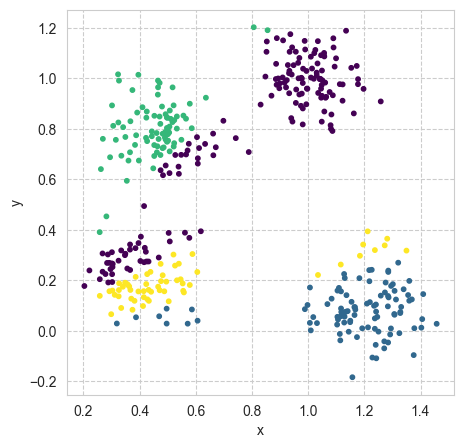

In [57]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4, metric='cosine', linkage='complete')
model.fit(voorbeeld2)

cm = sns.color_palette("viridis", as_cmap=True)

# model.labels_
fig, ax = plt.subplots(figsize=(5, 5))
_ = ax.scatter(voorbeeld2.x, voorbeeld2.y, c=model.labels_, cmap=cm, s=10)
_ = ax.set_xlabel("x")
_ = ax.set_ylabel("y")
_ = ax.grid(linestyle='--')


Met linkage kan je dendrogram tekenen


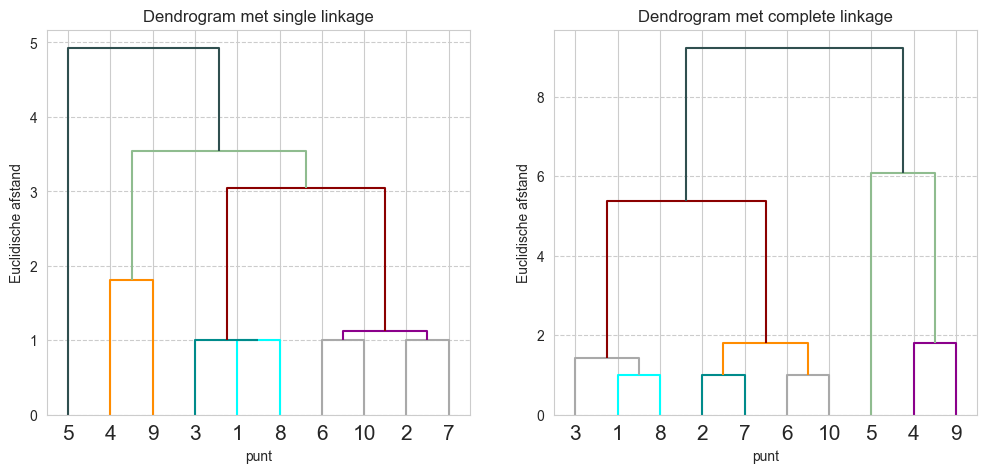

In [59]:
import matplotlib
from scipy.cluster.hierarchy import linkage, dendrogram

colors = list(matplotlib.colors.cnames.keys())[0:100:2]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
distances_single = linkage(voorbeeld1, method='single')
distances_complete = linkage(voorbeeld1, method='complete')
_ = ax[0].set_title('Dendrogram met single linkage')
_ = ax[0].set_xlabel('punt')
_ = ax[0].set_ylabel('Euclidische afstand')
_ = ax[0].grid(linestyle='--', axis='y')

dgram = dendrogram(distances_single,
                   labels=list(range(1, 11)),
                   link_color_func=lambda x: colors[x],
                   leaf_font_size=15.,
                   ax=ax[0])

_ = ax[1].set_title('Dendrogram met complete linkage')
_ = ax[1].set_xlabel('punt')
_ = ax[1].set_ylabel('Euclidische afstand')
_ = ax[1].grid(linestyle='--', axis='y')

dgram = dendrogram(distances_complete,
                   labels=list(range(1, 11)),
                   link_color_func=lambda x: colors[x],
                   leaf_font_size=15.,
                   ax=ax[1])


### Clusters bepalen uit dendrogram


In [62]:
from scipy.cluster.hierarchy import cut_tree

cuttree = cut_tree(distances_single, 6)
pd.DataFrame(cuttree).sort_values(by=0)


,0
0,0
2,0
7,0
1,1
6,1
3,2
4,3
5,4
9,4
8,5
